# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
from sklearn_evaluation import plot

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
diabet_df = pd.read_csv('diabetes.csv')
diabet_df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [3]:
# diabet_df.fillna(diabet_df.mean(), inplace=True)

diabet_df.isnull().sum()


Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

In [4]:
train_df, test_df = train_test_split(diabet_df, test_size=0.2, random_state=42)
train_df.shape, test_df.shape
X_train = train_df[['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy']]
y_train = train_df['Diabetes']
X_test = test_df[['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy']]
y_test = test_df['Diabetes']




# print(diabet_df.columns)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
def plot_feature_importance(model, model_name, feature_names):
    importances = model.feature_importances_

    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title(f"Feature Importances in {model_name}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
    plt.tight_layout()
    plt.show()

def param_importance(results, grid_params):
    num_params = len(grid_params)
    plt.figure(figsize=(5 * num_params, 5))

    for idx, param in enumerate(grid_params.keys(), start=1):
        plt.subplot(1, num_params, idx)
        mean_test_scores = results.groupby(f'param_{param}')['mean_test_score'].mean()
        
        mean_test_scores.plot(kind='bar', color='green')
        
        plt.ylim(mean_test_scores.min() * 0.99, mean_test_scores.max() * 1.01)
        plt.xlabel(f'{param}')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy for {param}')

    plt.tight_layout()
    plt.show()

    
    
def learning_curve_plot(train_sizes, train_scores, test_scores):
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curves Gradient Boosting")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

### AdaBoost Classifier

Best Parameters: {'learning_rate': 1, 'n_estimators': 100}
Accuracy: 0.9407665505226481


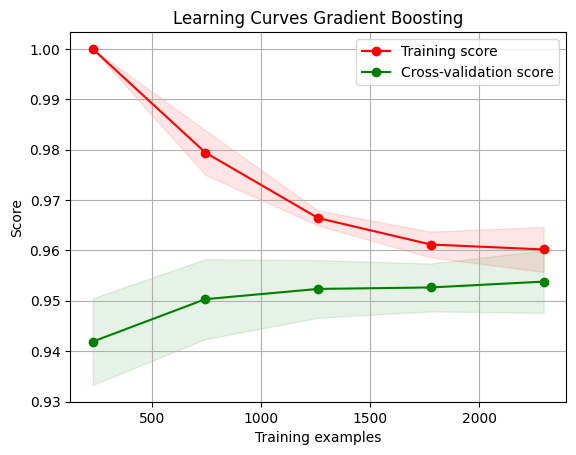

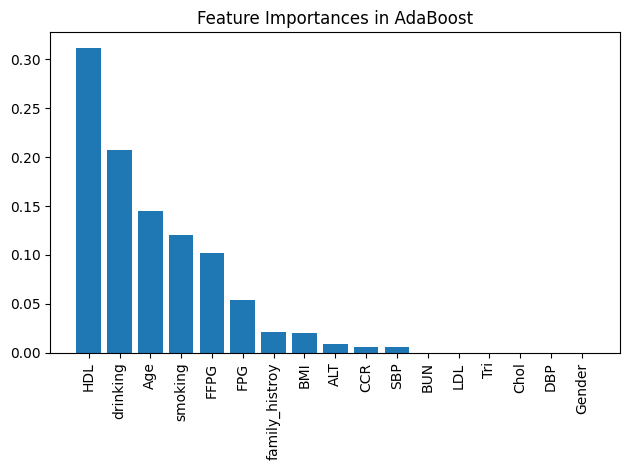

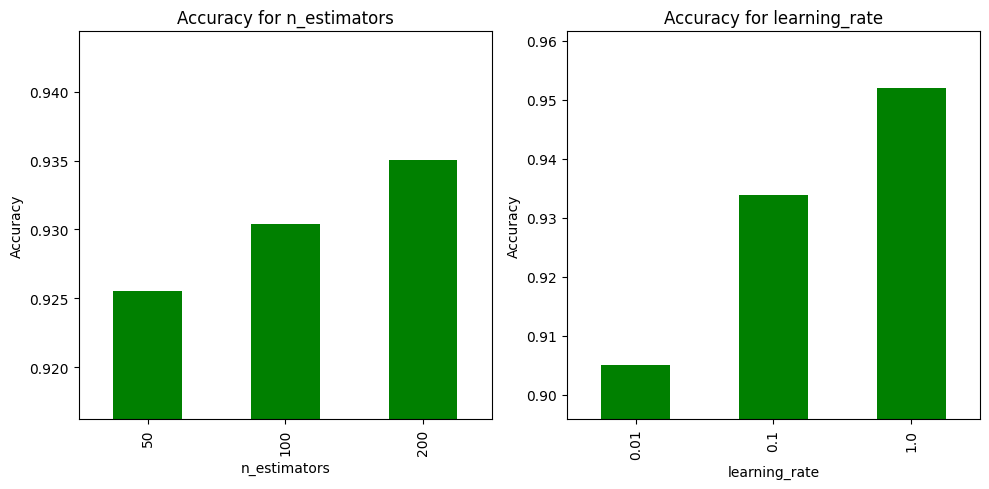

In [7]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

base_dt = DecisionTreeClassifier(max_depth=1)

ada_boost = AdaBoostClassifier(estimator=base_dt, random_state=42, algorithm='SAMME')

grid_search = GridSearchCV(estimator=ada_boost, param_grid=grid_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

best_ada_boost = grid_search.best_estimator_
y_pred = best_ada_boost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

train_sizes, train_scores, test_scores = learning_curve(
    best_ada_boost, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

learning_curve_plot(train_sizes, train_scores, test_scores)

plot_feature_importance(best_ada_boost, "AdaBoost", diabet_df.columns[:-1])

results = pd.DataFrame(grid_search.cv_results_)

param_importance(results, grid_params)




### AdaBoost Regressor

In [8]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

base_dt_reg = DecisionTreeRegressor(max_depth=1)
ada_boost_reg = AdaBoostRegressor(estimator=base_dt_reg, random_state=42)

grid_search = GridSearchCV(estimator=ada_boost_reg, param_grid=grid_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

best_ada_boost_reg = grid_search.best_estimator_
y_pred = best_ada_boost_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')




Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
MSE: 0.09


### Gradient Boosting Classifier

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.94


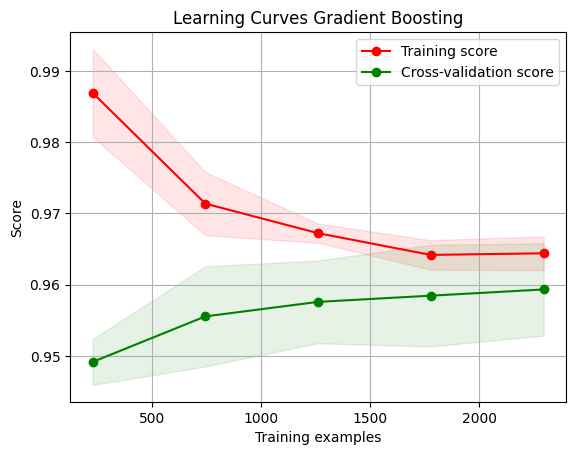

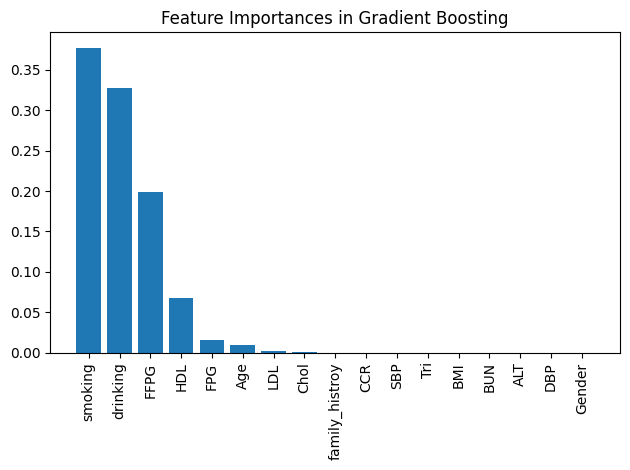

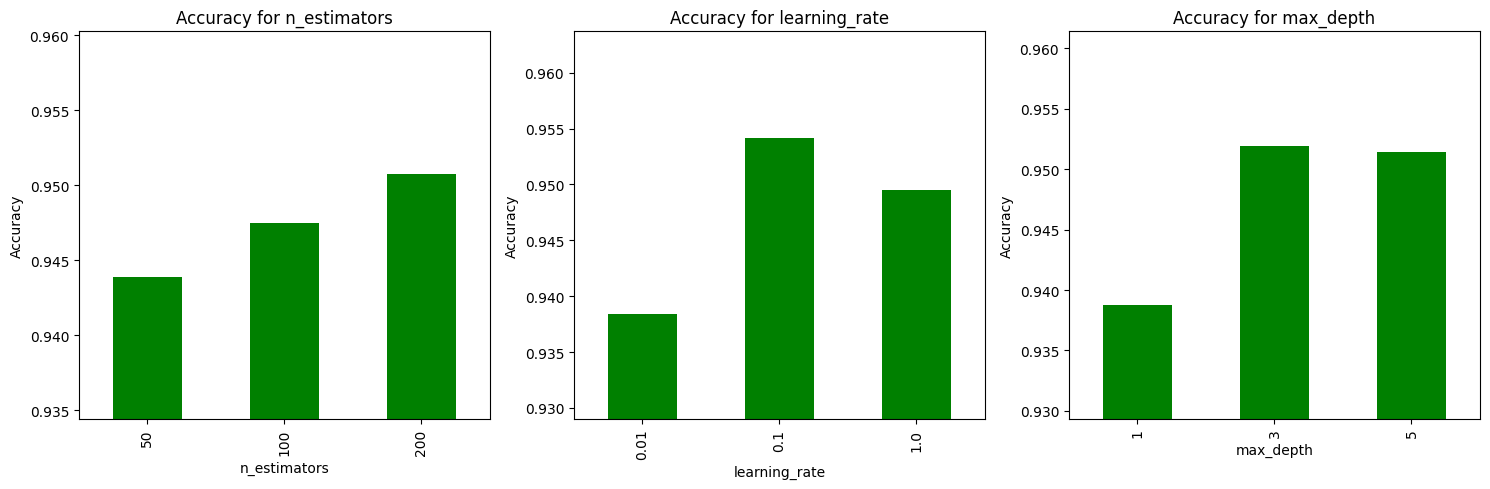

In [9]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5]
}

gboost = GradientBoostingClassifier(random_state=42)


grid_search = GridSearchCV(estimator=gboost, param_grid=grid_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

best_gboost = grid_search.best_estimator_
y_pred = best_gboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

train_sizes, train_scores, test_scores = learning_curve(
    best_gboost, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

learning_curve_plot(train_sizes, train_scores, test_scores)

plot_feature_importance(best_gboost, "Gradient Boosting", diabet_df.columns[:-1])

results = pd.DataFrame(grid_search.cv_results_)

param_importance(results, grid_params)


### Gradient Boosting Regressor

In [10]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5]
}

gboost_reg = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gboost_reg, param_grid=grid_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

best_gboost_reg = grid_search.best_estimator_
y_pred = best_gboost_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')



Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MSE: 0.04


### XGBoost Classifier

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.9442508710801394


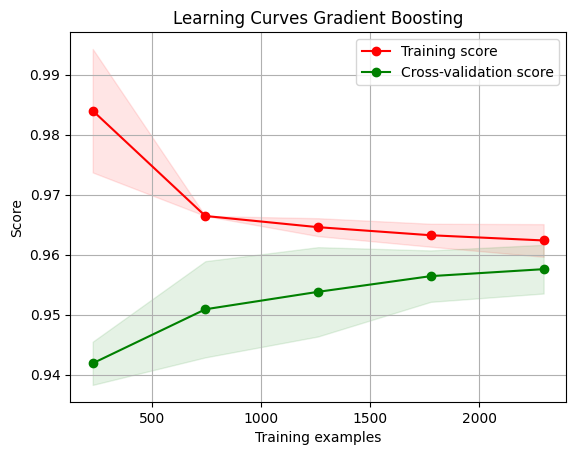

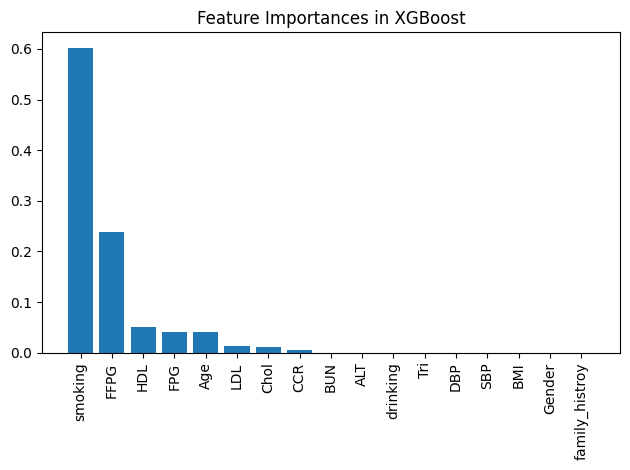

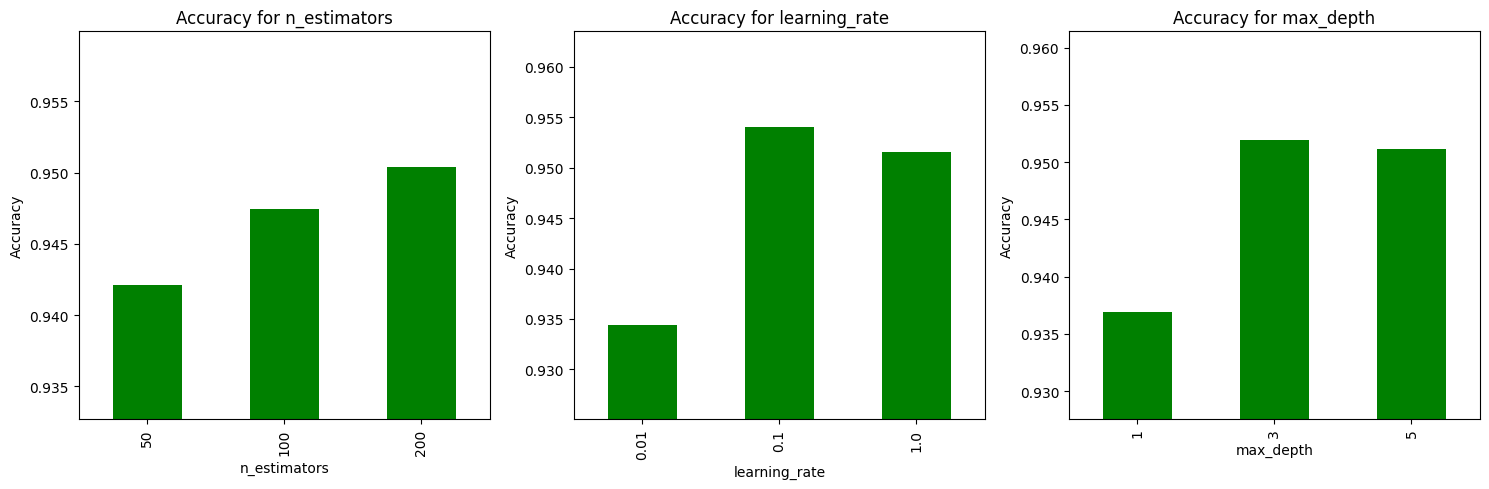

In [11]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5]
}

xgb = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=grid_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

learning_curve_plot(train_sizes, train_scores, test_scores)
plot_feature_importance(best_xgb, "XGBoost", diabet_df.columns[:-1])

results = pd.DataFrame(grid_search.cv_results_)

param_importance(results, grid_params)


### XGBoost Regressor

In [12]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5]
}

xgb_reg = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=grid_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

best_xgb_reg = grid_search.best_estimator_
y_pred = best_xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MSE: 0.04


# With regularization

### XGBoost Classifier

Best Main Parameters: {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.8}
Final Accuracy: 0.9454123112659698


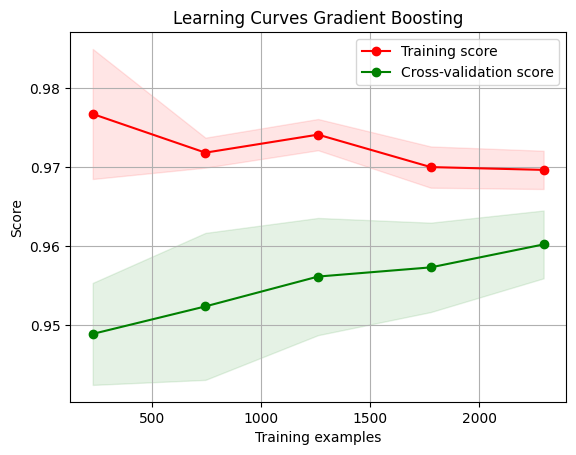

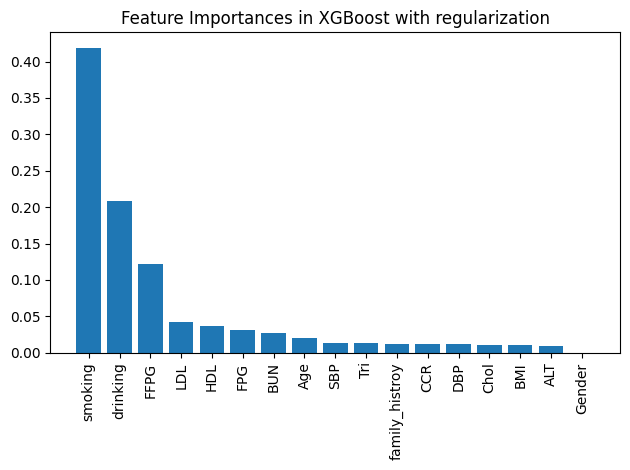

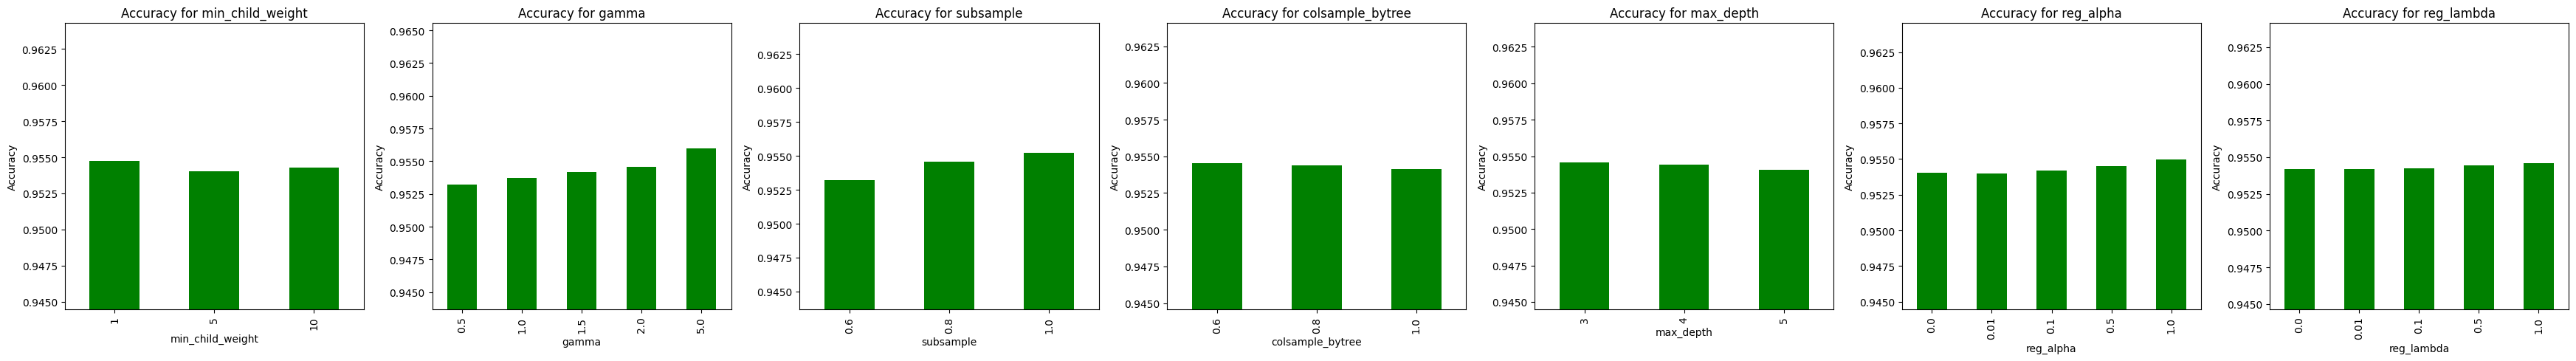

In [13]:

grid_params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1],
}

xgb = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=grid_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Main Parameters: {grid_search.best_params_}')

best_xgb_reg = grid_search.best_estimator_


y_pred = best_xgb_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Final Accuracy: {accuracy}')

train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_reg, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

learning_curve_plot(train_sizes, train_scores, test_scores)

plot_feature_importance(best_xgb_reg, "XGBoost with regularization", diabet_df.columns[:-1])

results = pd.DataFrame(grid_search.cv_results_)

param_importance(results, grid_params)


In [14]:
for model_name, model in [
    ("AdaBoost", best_ada_boost),
    ("Gradient Boosting", best_gboost),
    ("XGBoost without regularization", best_xgb),
    ("XGBoost with regularization", best_xgb_reg),
]:
    y_pred = model.predict(X_test)
    print(model_name)
    print(classification_report(y_test, y_pred))

AdaBoost
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.92       861
weighted avg       0.94      0.94      0.94       861

Gradient Boosting
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.94      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861

XGBoost without regularization
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg    

### Як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.


- Збільшується узагальнююча здатність моделі. Модель менше піддається впливу шуму і зменшується ризик перенавчання. Коли модель надто точно підлаштовується під навчальний набір вона перенавчається і може погано узагальнювати інформацію на нових даних що знижує її продуктивність на тестовому наборі. Регуляризація додає штрафи за занадто великі дерева чим покращує роботу моделі на нових даних.

- Також вона зменшує ваги моделі накладаючи штрафи за їх великі значення. Це дозволяє моделі бути менш чутливою до невеликих коливань у даних і краще виявляти основні закономірності.

- Якщо застосовувати регуляризація занадто агресивно то вона може настільки спростити модель що вона не зможе виявляти важливі патерни в даних і буде мати гірші результати.

### Яку модель і чому я вважаю найкращою для вирішення задачі.

Модель XGboost з регуляризацією показала найвищий результат 0.95 що робить її найкращою за метриками точності. Але тут можливі проблеми бо на візуалізації з важливістю фічей є 2 домінуючі ознаки (куріння і вживання алкоголю) а інші ознаки грають набагато меншу роль. Це погано бо модель погано працюватиме на нових даних бо вона погано узагальнює результати і це не ключові фактори для діабету.

### Як впливала регуляризація на продуктивність моделей, та що б я змінив в параметрах для кращого результату.

Регуляризація підвищила продуктивність моделі XGBoost, підвищивши точність з 94.42 до 94.54.

Для 1 класу recall зріс з 0.84 до 0.85, f1-score з 0.89 до 0.90.

Щоб покращити результат можна:
- виділити більш важливі фічі
- розширити діапазон регуляризійних значень
- зменшити learning_rate і збільшити n_estimators 
- використовувати балансування класів.